In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

匯入data

In [3]:
x = np.genfromtxt('preprocessed_x.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y.csv', delimiter=',', dtype= None)

In [ ]:
feature_names=[]
for names in y:
  if names not in feature_names:
    feature_names.append(names)

AdaBoostClassifier(base_estimator = RandomForestClassifier())
                   precision    recall  f1-score   support

      b'bathroom'       1.00      0.14      0.25         7
       b'driving'       0.71      0.30      0.43        33
        b'eating'       0.00      0.00      0.00        45
         b'lying'       0.73      0.23      0.35        47
        b'riding'       0.00      0.00      0.00         2
       b'sitting'       0.63      0.88      0.74       216
      b'standing'       0.00      0.00      0.00         2
b'using_computer'       0.81      0.96      0.88       232
       b'walking'       1.00      0.04      0.07        28

         accuracy                           0.71       612
        macro avg       0.54      0.28      0.30       612
     weighted avg       0.68      0.71      0.65       612



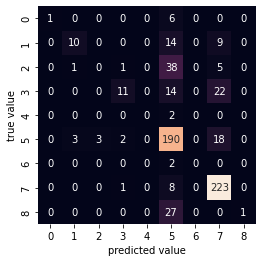

In [4]:
adb = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators=50, learning_rate=1.0, 
                         algorithm='SAMME.R', random_state=None)
for splits in range(5,7):
    fin_pred = cross_val_predict(adb, x, y, cv=splits)
    print("AdaBoost")
    print(classification_report(y, fin_pred))

    cm = confusion_matrix(y_target=y, 
                y_predicted=fin_pred, 
                binary=False)
    fig,ax=plot_confusion_matrix(conf_mat=cm
                ,show_absolute=True
                ,show_normed=False
                ,colorbar=False
                ,class_names=feature_names
                #,cmap='PuBu'
                ,fontcolor_threshold=0.6
                )
    plt.show()